# 5. Training model - Multi-class classifiers

<hr style="border:2px solid black"> </hr>

In [159]:
# Load the processed data in file 'Data_structure_and_processing.ipynb'

import dill
dill.load_session('Data_structure_and_processing.db')

### 5.1 Multi-class classifiers (All male data)
Data:
   - dataM_train
   - dataM_train_labels
   - dataM_test
   - dataM_test_labels



---
### 5.1.1 SVM
- __Baseline__

In [2]:
# =======================
# Training set (male)
# =======================

start = time.process_time()
svm_clf_1 = SVC(kernel="linear", random_state=42)
svm_clf_1.fit(dataM_train, dataM_train_labels)

pred = cross_val_predict(svm_clf_1, dataM_train, dataM_train_labels, cv=10, n_jobs=-1)

print('Times: ',time.process_time() - start)
print(confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

Times:  169.78125
[[88 33  3]
 [32 45 15]
 [10 18 36]]
              precision    recall  f1-score   support

         1.0       0.68      0.71      0.69       124
         2.0       0.47      0.49      0.48        92
         3.0       0.67      0.56      0.61        64

    accuracy                           0.60       280
   macro avg       0.60      0.59      0.59       280
weighted avg       0.61      0.60      0.60       280



In [3]:
# =======================
# Testing set (male)
# =======================

start = time.process_time()

pred = cross_val_predict(svm_clf_1, dataM_test, dataM_test_labels, cv=10)

print('Times: ',time.process_time() - start)
print(confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Times:  3.265625
[[26  3  3]
 [ 8  9  6]
 [ 4 10  2]]
              precision    recall  f1-score   support

         1.0       0.68      0.81      0.74        32
         2.0       0.41      0.39      0.40        23
         3.0       0.18      0.12      0.15        16

    accuracy                           0.52        71
   macro avg       0.43      0.44      0.43        71
weighted avg       0.48      0.52      0.50        71



---
- __RFECV (SVM - Linear)__

Optimal number of features : 131
Time:  9163.453125


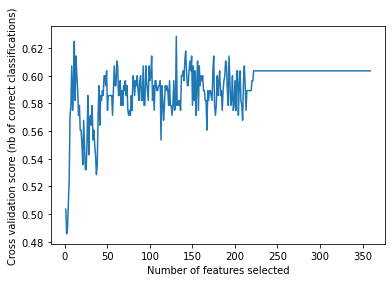

In [1332]:
# =======================
# RFECV (SVM - Linear)
# Male data
# =======================


svm_clf_2 = SVC(kernel="linear", random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_svm_1 = RFECV(estimator=svm_clf_2, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_svm_1.fit(dataM_train, dataM_train_labels)
rfecv_svm_1_dataM_train = rfecv_svm_1.transform(dataM_train)
rfecv_svm_1_dataM_test = rfecv_svm_1.transform(dataM_test)


print("Optimal number of features : %d" % rfecv_svm_1.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_svm_1.grid_scores_) + min_features_to_select),
         rfecv_svm_1.grid_scores_)
plt.show()

In [1391]:
cols = rfecv_svm_1.get_support(indices=True)
x_train_new = dataM_train.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.volume',
 'lh.caudalanteriorcingulate.volume',
 'lh.cuneus.volume',
 'lh.entorhinal.volume',
 'lh.inferiortemporal.volume',
 'lh.isthmuscingulate.volume',
 'lh.lateralorbitofrontal.volume',
 'lh.lingual.volume',
 'lh.medialorbitofrontal.volume',
 'lh.parahippocampal.volume',
 'lh.paracentral.volume',
 'lh.parsopercularis.volume',
 'lh.parstriangularis.volume',
 'lh.pericalcarine.volume',
 'lh.posteriorcingulate.volume',
 'lh.precentral.volume',
 'lh.precuneus.volume',
 'lh.rostralanteriorcingulate.volume',
 'lh.rostralmiddlefrontal.volume',
 'lh.superiorfrontal.volume',
 'lh.supramarginal.volume',
 'lh.frontalpole.volume',
 'lh.temporalpole.volume',
 'lh.transversetemporal.volume',
 'rh.bankssts.volume',
 'rh.cuneus.volume',
 'rh.fusiform.volume',
 'rh.inferiorparietal.volume',
 'rh.inferiortemporal.volume',
 'rh.isthmuscingulate.volume',
 'rh.lateraloccipital.volume',
 'rh.lateralorbitofrontal.volume',
 'rh.lingual.volume',
 'rh.middletemporal.volume',
 'rh.parahippocamp

---
- __Only use the data after RFECV__

In [1333]:
# =======================
# Training set (male)
# =======================

start = time.process_time()
svm_clf_3 = SVC(kernel="linear", random_state=42)
svm_clf_3.fit(rfecv_svm_1_dataM_train, dataM_train_labels)

pred = cross_val_predict(svm_clf_3, rfecv_svm_1_dataM_train, dataM_train_labels, cv=10, n_jobs=-1)

print(time.process_time() - start)
print(confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

8.6875
[[92 29  3]
 [29 51 12]
 [10 12 42]]
              precision    recall  f1-score   support

         1.0       0.70      0.74      0.72       124
         2.0       0.55      0.55      0.55        92
         3.0       0.74      0.66      0.69        64

    accuracy                           0.66       280
   macro avg       0.66      0.65      0.66       280
weighted avg       0.66      0.66      0.66       280



In [1334]:
# =======================
# Testing set (male)
# =======================

start = time.process_time()

pred = cross_val_predict(svm_clf_3, rfecv_svm_1_dataM_test, dataM_test_labels, cv=10)

print(time.process_time() - start)
print(confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

1.171875
[[27  4  1]
 [ 8 10  5]
 [ 5  6  5]]
              precision    recall  f1-score   support

         1.0       0.68      0.84      0.75        32
         2.0       0.50      0.43      0.47        23
         3.0       0.45      0.31      0.37        16

    accuracy                           0.59        71
   macro avg       0.54      0.53      0.53        71
weighted avg       0.57      0.59      0.57        71



---
- __RFECV (SVM) + Feature scaling + PCA__

In [1398]:
# Training set (male)
# RFECV (SVM)


svm_clf_4 = SVC(kernel="linear", random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_svm_1_dataM_train)

# Dimension reduction
pca = PCA(n_components=0.95)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)


svm_clf_4.fit(x_train_scaled_reduced, dataM_train_labels)
pred = cross_val_predict(svm_clf_4, x_train_scaled_reduced, dataM_train_labels, cv=10)


print(time.process_time() - start)
print(confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

[0.33549029 0.08393331 0.04259128 0.03200991 0.02673    0.0239618
 0.02029074 0.01992122 0.01741889 0.01713275 0.01568437 0.01464342
 0.01347796 0.01243299 0.01187145 0.01130157 0.01123096 0.00990679
 0.00976263 0.00958683 0.00930529 0.0089066  0.00846904 0.00801105
 0.00770446 0.00732856 0.00726023 0.00689637 0.00673332 0.00659756
 0.00643533 0.00606666 0.00598566 0.00579599 0.00565148 0.00546289
 0.00512685 0.0050372  0.00488137 0.00472927 0.00459681 0.00441456
 0.00421578 0.00407273 0.00401177 0.00383804 0.00367108 0.00356874
 0.00348309 0.00340353 0.00327256 0.00321927 0.00308871 0.00305861
 0.00286294 0.00277991 0.00269947 0.00265512 0.00258289 0.00247842
 0.00243784 0.00240496 0.0022972  0.00225957 0.00216079]
[44.1067527  11.03467369  5.59945564  4.20832822  3.51418087  3.15024707
  2.66761382  2.61903339  2.29005275  2.25243474  2.06201647  1.92516309
  1.7719408   1.63456002  1.56073373  1.48581213  1.47652899  1.30244142
  1.28348795  1.26037643  1.22336215  1.17094601  1.113

Text(0, 0.5, 'cumulative explained variance')

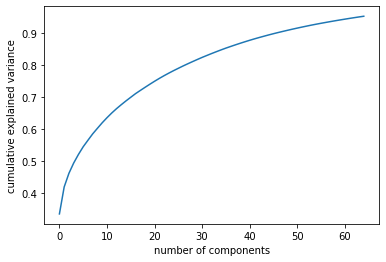

In [1399]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [1400]:
# Testing set (male)
# RFECV (SVM)


start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_svm_1_dataM_test)

# Dimension reduction
pca = PCA(n_components=0.95)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)


pred = cross_val_predict(svm_clf_4, x_test_scaled_reduced, dataM_test_labels, cv=10)


print(time.process_time() - start)
print(confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Components: 39
0.1875
[[26  4  2]
 [ 5 15  3]
 [ 4  7  5]]
              precision    recall  f1-score   support

         1.0       0.74      0.81      0.78        32
         2.0       0.58      0.65      0.61        23
         3.0       0.50      0.31      0.38        16

    accuracy                           0.65        71
   macro avg       0.61      0.59      0.59        71
weighted avg       0.63      0.65      0.63        71



<hr style="border:px solid black"> </hr>

### 5.1.2 Logistic Regression
- __Baseline__

In [1330]:
# ======================
# Training set (male)
# ======================


start = time.process_time()
log_reg_1 = LogisticRegression(max_iter=1000000, penalty='l2', random_state=42)
log_reg_1.fit(dataM_train, dataM_train_labels)

pred = cross_val_predict(log_reg_1, dataM_train, dataM_train_labels, cv=10, n_jobs=-1)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Times:  44.125
Confusion matrix: 
 [[82 33  9]
 [33 46 13]
 [ 5 18 41]]
              precision    recall  f1-score   support

         1.0       0.68      0.66      0.67       124
         2.0       0.47      0.50      0.49        92
         3.0       0.65      0.64      0.65        64

    accuracy                           0.60       280
   macro avg       0.60      0.60      0.60       280
weighted avg       0.61      0.60      0.61       280



In [1329]:
# ======================
# Testing set (male)
# ======================


start = time.process_time()

pred = cross_val_predict(log_reg_1, dataM_test, dataM_test_labels, cv=10, n_jobs=-1)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Times:  0.03125
Confusion matrix: 
 [[25  7  0]
 [ 7  9  7]
 [ 4  9  3]]
              precision    recall  f1-score   support

         1.0       0.69      0.78      0.74        32
         2.0       0.36      0.39      0.37        23
         3.0       0.30      0.19      0.23        16

    accuracy                           0.52        71
   macro avg       0.45      0.45      0.45        71
weighted avg       0.50      0.52      0.50        71



---
- __RFECV__

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Optimal number of features : 195
Time:  6402.25


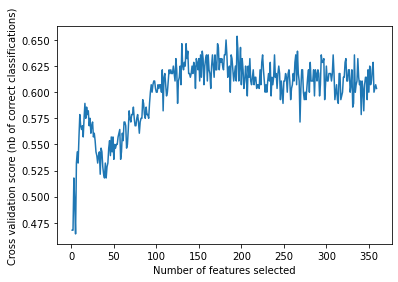

In [1331]:
# =============================
# Male data
# Logistic Regression - RFECV
# =============================


log_reg_2 = LogisticRegression(max_iter=100000000, penalty='l2', random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_lr_1 = RFECV(estimator=log_reg_2, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_lr_1.fit(dataM_train, dataM_train_labels)
rfecv_lr_1_dataM_train = rfecv_lr_1.transform(dataM_train)
rfecv_lr_1_dataM_test = rfecv_lr_1.transform(dataM_test)


print("Optimal number of features : %d" % rfecv_lr_1.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_lr_1.grid_scores_) + min_features_to_select),
         rfecv_lr_1.grid_scores_)
plt.show()


In [1410]:
cols = rfecv_lr_1.get_support(indices=True)
x_train_new = dataM_train.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.bankssts.volume',
 'lh.caudalanteriorcingulate.volume',
 'lh.caudalmiddlefrontal.volume',
 'lh.cuneus.volume',
 'lh.entorhinal.volume',
 'lh.fusiform.volume',
 'lh.inferiortemporal.volume',
 'lh.isthmuscingulate.volume',
 'lh.lateraloccipital.volume',
 'lh.lateralorbitofrontal.volume',
 'lh.lingual.volume',
 'lh.medialorbitofrontal.volume',
 'lh.middletemporal.volume',
 'lh.parahippocampal.volume',
 'lh.paracentral.volume',
 'lh.parsopercularis.volume',
 'lh.parsorbitalis.volume',
 'lh.parstriangularis.volume',
 'lh.pericalcarine.volume',
 'lh.postcentral.volume',
 'lh.posteriorcingulate.volume',
 'lh.precentral.volume',
 'lh.precuneus.volume',
 'lh.rostralanteriorcingulate.volume',
 'lh.rostralmiddlefrontal.volume',
 'lh.superiorfrontal.volume',
 'lh.superiorparietal.volume',
 'lh.superiortemporal.volume',
 'lh.supramarginal.volume',
 'lh.frontalpole.volume',
 'lh.temporalpole.volume',
 'lh.transversetemporal.volume',
 'lh.insula.volume',
 'rh.bankssts.volume',
 'rh.caudalanterio

---
- __Only use the data after RFECV__

In [1408]:
# =======================
# rfecv - train set
# =======================

start = time.process_time()
log_reg_3 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
log_reg_3.fit(rfecv_lr_1_dataM_train, dataM_train_labels)

pred = cross_val_predict(log_reg_3, rfecv_lr_1_dataM_train, dataM_train_labels, cv=10, n_jobs=-1)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

Times:  29.359375
Confusion matrix: 
 [[88 29  7]
 [27 49 16]
 [ 8 16 40]]
              precision    recall  f1-score   support

         1.0       0.72      0.71      0.71       124
         2.0       0.52      0.53      0.53        92
         3.0       0.63      0.62      0.63        64

    accuracy                           0.63       280
   macro avg       0.62      0.62      0.62       280
weighted avg       0.63      0.63      0.63       280



In [1409]:
# =======================
# rfecv - test set
# =======================

start = time.process_time()

pred = cross_val_predict(log_reg_3, rfecv_lr_1_dataM_test, dataM_test_labels, cv=10, n_jobs=-1)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Times:  0.0
Confusion matrix: 
 [[27  4  1]
 [ 6 12  5]
 [ 4  9  3]]
              precision    recall  f1-score   support

         1.0       0.73      0.84      0.78        32
         2.0       0.48      0.52      0.50        23
         3.0       0.33      0.19      0.24        16

    accuracy                           0.59        71
   macro avg       0.51      0.52      0.51        71
weighted avg       0.56      0.59      0.57        71



---
- __RFECV (Logistic Regression) + Feature scaling + PCA__

In [1443]:
# =======================
# training set
# =======================


log_reg_4 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr_1_dataM_train)

# Dimension reduction
pca = PCA(n_components=0.6)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)


print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)


log_reg_4.fit(x_train_scaled_reduced, dataM_train_labels)

pred = cross_val_predict(log_reg_4, x_train_scaled_reduced, dataM_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

[0.34566391 0.06955917 0.03918058 0.02780574 0.02437743 0.02176671
 0.01941156 0.01834444 0.01583138 0.01515509 0.01471252]
[67.64605569 13.61265476  7.66759821  5.44155379  4.77063753  4.2597218
  3.79882188  3.58998791  3.09818412  2.96583443  2.87922525]
Components: 11
Times:  0.9375
Confusion matrix: 
 [[94 26  4]
 [30 45 17]
 [ 9 14 41]]
              precision    recall  f1-score   support

         1.0       0.71      0.76      0.73       124
         2.0       0.53      0.49      0.51        92
         3.0       0.66      0.64      0.65        64

    accuracy                           0.64       280
   macro avg       0.63      0.63      0.63       280
weighted avg       0.64      0.64      0.64       280



Text(0, 0.5, 'cumulative explained variance')

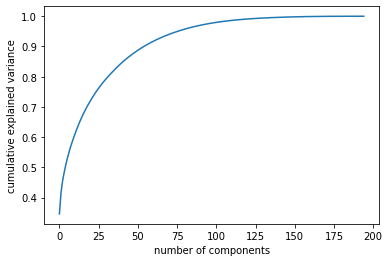

In [1442]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [1438]:
# test set

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_lr_1_dataM_test)

# Dimension reduction
pca = PCA(n_components=0.6)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(log_reg_4, x_test_scaled_reduced, dataM_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Components: 7
Times:  0.984375
Confusion matrix: 
 [[23  7  2]
 [ 6 13  4]
 [ 2  7  7]]
              precision    recall  f1-score   support

         1.0       0.74      0.72      0.73        32
         2.0       0.48      0.57      0.52        23
         3.0       0.54      0.44      0.48        16

    accuracy                           0.61        71
   macro avg       0.59      0.57      0.58        71
weighted avg       0.61      0.61      0.61        71



<hr style="border:px solid black"> </hr>

## 5.1.3 Decision tree

- __Baseline__

In [1237]:
# ===========
# train set
# ===========


start = time.process_time()
tree_clf_1 = DecisionTreeClassifier(random_state=42)
tree_clf_1.fit(dataM_train, dataM_train_labels)

pred = cross_val_predict(tree_clf_1, dataM_train, dataM_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

Times:  0.5
Confusion matrix: 
 [[72 39 13]
 [32 44 16]
 [ 9 18 37]]
              precision    recall  f1-score   support

         1.0       0.64      0.58      0.61       124
         2.0       0.44      0.48      0.46        92
         3.0       0.56      0.58      0.57        64

    accuracy                           0.55       280
   macro avg       0.54      0.55      0.54       280
weighted avg       0.55      0.55      0.55       280



In [1238]:
# ===========
# test set
# ===========

start = time.process_time()

pred = cross_val_predict(tree_clf_1, dataM_test, dataM_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Times:  0.15625
Confusion matrix: 
 [[20  8  4]
 [ 6  9  8]
 [ 5  6  5]]
              precision    recall  f1-score   support

         1.0       0.65      0.62      0.63        32
         2.0       0.39      0.39      0.39        23
         3.0       0.29      0.31      0.30        16

    accuracy                           0.48        71
   macro avg       0.44      0.44      0.44        71
weighted avg       0.48      0.48      0.48        71



---
- __RFECV (Decision Tree Classifier)__

Optimal number of features : 345
Time:  0.84375


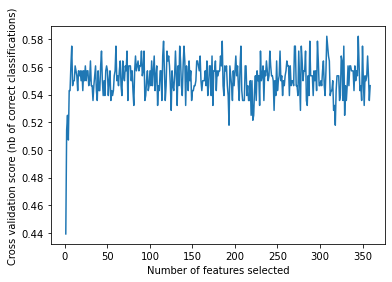

In [2]:
# Male data
# Decision Tree - RFECV

tree_clf_2 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_tree_1 = RFECV(estimator=tree_clf_2, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_tree_1.fit(dataM_train, dataM_train_labels)
rfecv_tree_1_dataM_train = rfecv_tree_1.transform(dataM_train)
rfecv_tree_1_dataM_test = rfecv_tree_1.transform(dataM_test)


print("Optimal number of features : %d" % rfecv_tree_1.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_tree_1.grid_scores_) + min_features_to_select),
         rfecv_tree_1.grid_scores_)
plt.show()


In [1323]:
cols = rfecv_tree_1.get_support(indices=True)
dataM_train_new_1 = dataM_train.iloc[:,cols]

dataM_train_new_1.columns.values.tolist()      # Optimal feature's name

['lh.entorhinal.thickness',
 'lh.fusiform.thickness',
 'lh.inferiorparietal.thickness',
 'lh.inferiortemporal.thickness',
 'lh.isthmuscingulate.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lateralorbitofrontal.thickness',
 'lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.parsorbitalis.thickness',
 'lh.parstriangularis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'lh.transversetemporal.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.

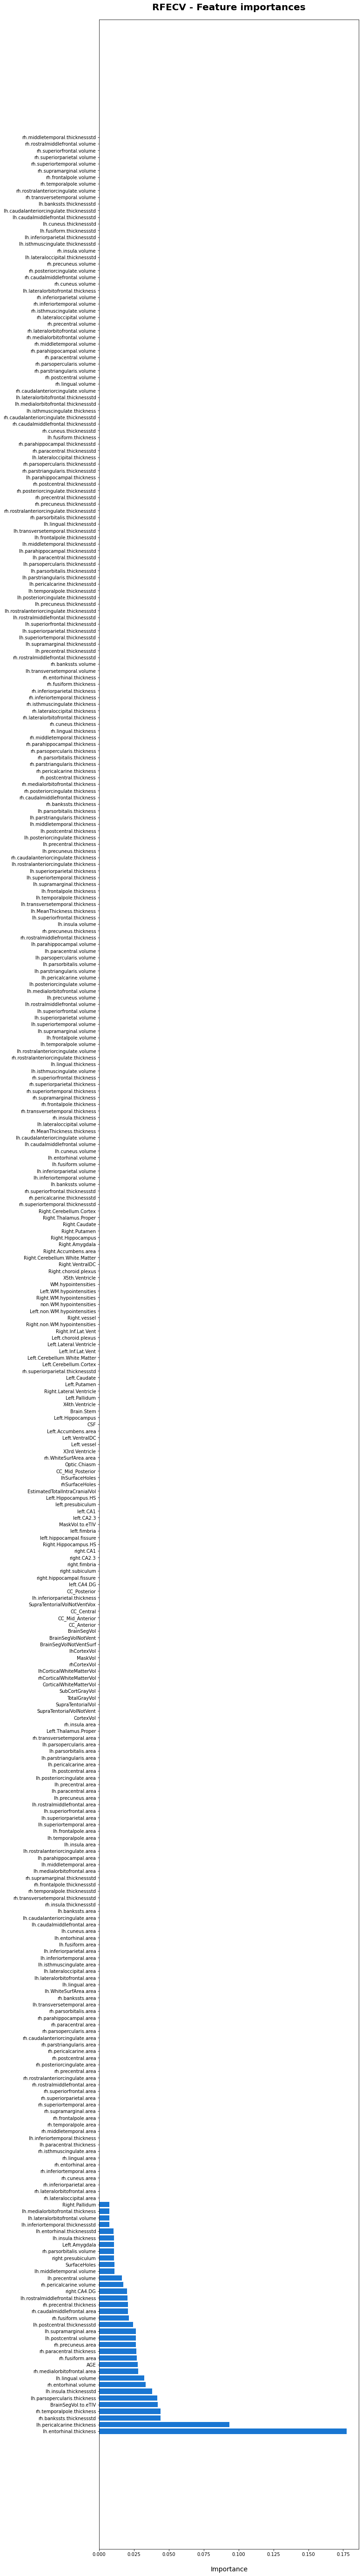

In [1324]:
dset = pd.DataFrame()
dset['attr'] = dataM_train_new_1.columns.values
dset['importance'] = rfecv_tree_1.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 100))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [1290]:
# ===================
# rfecv - train set
# ===================

start = time.process_time()
tree_clf_3 = DecisionTreeClassifier(random_state=42)
tree_clf_3.fit(rfecv_tree_1_dataM_train, dataM_train_labels)

pred = cross_val_predict(tree_clf_3, rfecv_tree_1_dataM_train, dataM_train_labels, cv=10)


print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

Times:  0.421875
Confusion matrix: 
 [[82 30 12]
 [33 38 21]
 [12 15 37]]
              precision    recall  f1-score   support

         1.0       0.65      0.66      0.65       124
         2.0       0.46      0.41      0.43        92
         3.0       0.53      0.58      0.55        64

    accuracy                           0.56       280
   macro avg       0.54      0.55      0.55       280
weighted avg       0.56      0.56      0.56       280



In [1296]:
# ===================
# rfecv - test set
# ===================

start = time.process_time()

pred = cross_val_predict(tree_clf_3, rfecv_tree_1_dataM_test, dataM_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Times:  0.078125
Confusion matrix: 
 [[21  8  3]
 [ 7  9  7]
 [ 4  5  7]]
              precision    recall  f1-score   support

         1.0       0.66      0.66      0.66        32
         2.0       0.41      0.39      0.40        23
         3.0       0.41      0.44      0.42        16

    accuracy                           0.52        71
   macro avg       0.49      0.50      0.49        71
weighted avg       0.52      0.52      0.52        71



---
- __RFECV (DT) + Feature scaling + PCA__

In [31]:
# =======================
# training set
# =======================

tree_clf_4 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_tree_1_dataM_train)

# Dimension reduction
pca = PCA(n_components=4)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)


print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)


tree_clf_4.fit(x_train_scaled_reduced, dataM_train_labels)

pred = cross_val_predict(tree_clf_4, x_train_scaled_reduced, dataM_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

[0.23276089 0.114719   0.06083223 0.0474151 ]
[79.65594949 39.25939178 20.81814193 16.22650176]
Components: 4
Times:  0.28125
Confusion matrix: 
 [[82 31 11]
 [25 46 21]
 [12 18 34]]
              precision    recall  f1-score   support

         1.0       0.69      0.66      0.67       124
         2.0       0.48      0.50      0.49        92
         3.0       0.52      0.53      0.52        64

    accuracy                           0.58       280
   macro avg       0.56      0.56      0.56       280
weighted avg       0.58      0.58      0.58       280



In [30]:
# test set

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_tree_1_dataM_test)

# Dimension reduction
pca = PCA(n_components=4)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(tree_clf_4, x_test_scaled_reduced, dataM_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Components: 4
Times:  0.109375
Confusion matrix: 
 [[23  6  3]
 [ 6 14  3]
 [ 5  5  6]]
              precision    recall  f1-score   support

         1.0       0.68      0.72      0.70        32
         2.0       0.56      0.61      0.58        23
         3.0       0.50      0.38      0.43        16

    accuracy                           0.61        71
   macro avg       0.58      0.57      0.57        71
weighted avg       0.60      0.61      0.60        71



<hr style="border:px solid black"> </hr>

## 5.1.4 Random Forest
- __Baseline__

In [1297]:
# ============
# train set
# ============

start = time.process_time()
forest_clf_1 = RandomForestClassifier(random_state=42)
forest_clf_1.fit(dataM_train, dataM_train_labels)

pred = cross_val_predict(forest_clf_1, dataM_train, dataM_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

Times:  2.609375
Confusion matrix: 
 [[96 23  5]
 [39 37 16]
 [ 8 13 43]]
              precision    recall  f1-score   support

         1.0       0.67      0.77      0.72       124
         2.0       0.51      0.40      0.45        92
         3.0       0.67      0.67      0.67        64

    accuracy                           0.63       280
   macro avg       0.62      0.62      0.61       280
weighted avg       0.62      0.63      0.62       280



In [1298]:
# test set

start = time.process_time()

pred = cross_val_predict(forest_clf_1, dataM_test, dataM_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Times:  1.328125
Confusion matrix: 
 [[28  2  2]
 [ 9 11  3]
 [ 4  5  7]]
              precision    recall  f1-score   support

         1.0       0.68      0.88      0.77        32
         2.0       0.61      0.48      0.54        23
         3.0       0.58      0.44      0.50        16

    accuracy                           0.65        71
   macro avg       0.63      0.60      0.60        71
weighted avg       0.64      0.65      0.63        71



---
### RFECV (Random Forest Classifier) 

Optimal number of features : 73
Time:  64.15625


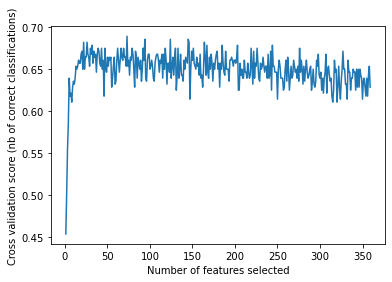

In [64]:
# Male data
# Random Forest - RFECV

forest_clf_2 = RandomForestClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_forest_1 = RFECV(estimator=forest_clf_2, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_forest_1.fit(dataM_train, dataM_train_labels)
rfecv_forest_1_dataM_train = rfecv_forest_1.transform(dataM_train)
rfecv_forest_1_dataM_test = rfecv_forest_1.transform(dataM_test)


print("Optimal number of features : %d" % rfecv_forest_1.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_forest_1.grid_scores_) + min_features_to_select),
         rfecv_forest_1.grid_scores_)
plt.show()


In [238]:
cols = rfecv_forest_1.get_support(indices=True)
dataM_train_new_2 = dataM_train.iloc[:,cols]

dataM_train_new_2.columns.values.tolist()      # Optimal feature's name

['lh.caudalmiddlefrontal.thickness',
 'lh.entorhinal.thickness',
 'lh.inferiorparietal.thickness',
 'lh.lingual.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.pericalcarine.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'rh.cuneus.thickness',
 'rh.entorhinal.thickness',
 'rh.fusiform.thickness',
 'rh.inferiorparietal.thickness',
 'rh.inferiortemporal.thickness',
 'rh.lingual.thickness',
 'rh.middletemporal.thickness',
 'rh.parahippocampal.thickness',
 'rh.pericalcarine.thickness',
 'rh.temporalpole.thickness',
 'lh.cuneus.volume',
 'lh.entorhinal.volume',
 'lh.isthmuscingulate.volume',
 'lh.lingual.volume',
 'lh.middletemporal.volume',
 'lh.pericalcarine.volume',
 'rh.entorhinal.volume',
 'rh.lingual.volume',
 'rh.pericalcarine.volume',
 'rh.superiorparietal.volume',
 'lh.bankssts.thicknessstd',
 'lh.lateralorbitofrontal.thicknessstd',
 'lh.medialorbitofrontal.thicknessstd',
 'lh.parsopercularis.thicknessstd',
 'lh.parstriangularis.thicknessstd',


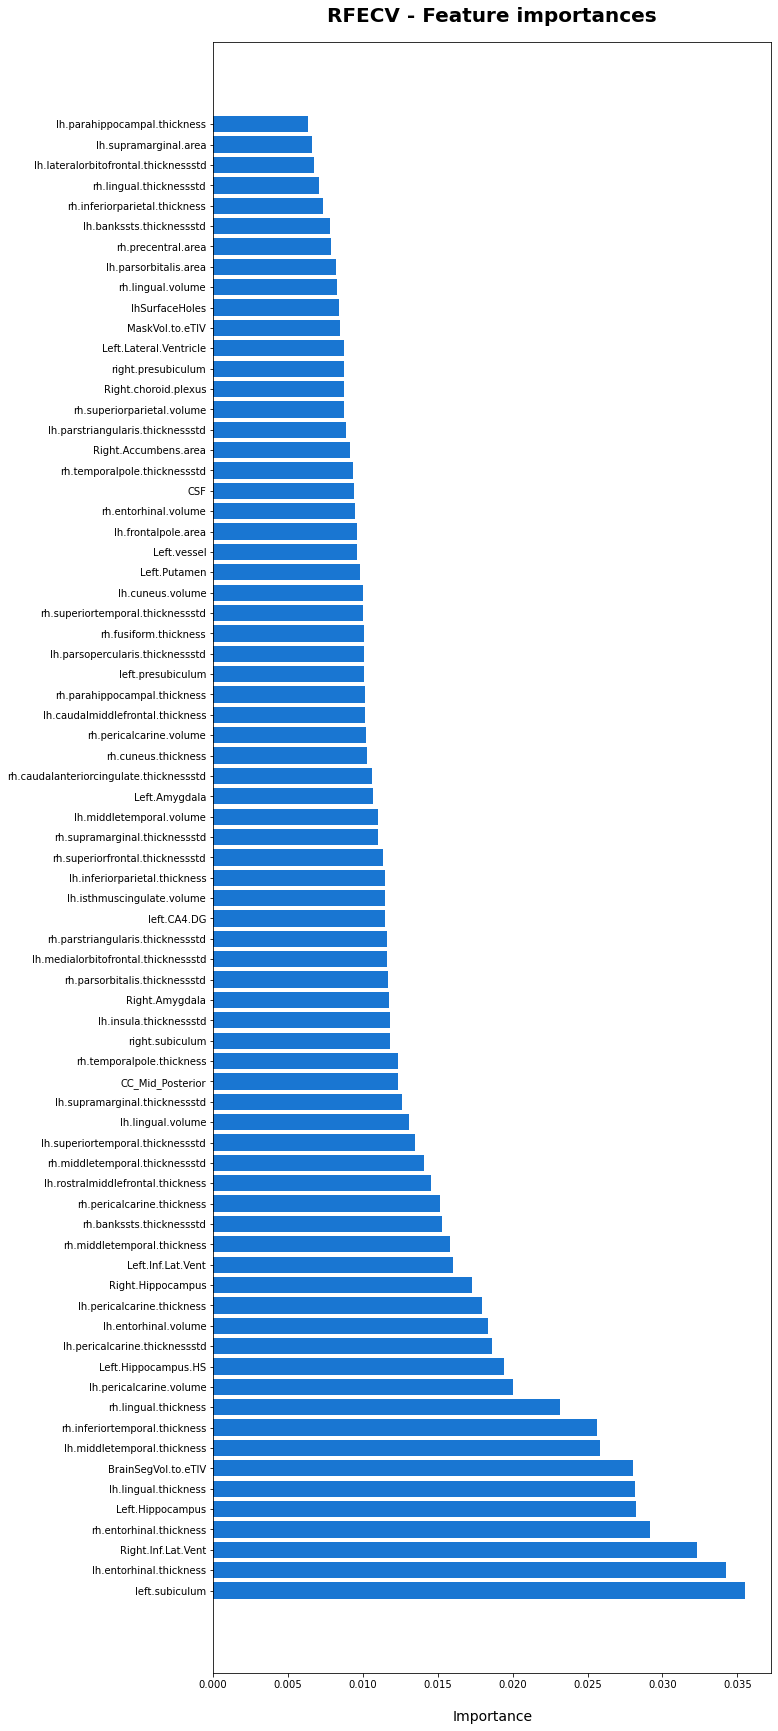

In [240]:
dset = pd.DataFrame()
dset['attr'] = dataM_train_new_2.columns.values
dset['importance'] = rfecv_forest_1.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 30))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [242]:
# ======================
# rfecv - training set
# ======================

start = time.process_time()
forest_clf_3 = RandomForestClassifier(random_state=44)
forest_clf_3.fit(rfecv_forest_1_dataM_train, dataM_train_labels)

pred = cross_val_predict(forest_clf_3, rfecv_forest_1_dataM_train, dataM_train_labels, cv=10)


print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

Times:  1.875
Confusion matrix: 
 [[98 22  4]
 [28 51 13]
 [ 6 16 42]]
              precision    recall  f1-score   support

         1.0       0.74      0.79      0.77       124
         2.0       0.57      0.55      0.56        92
         3.0       0.71      0.66      0.68        64

    accuracy                           0.68       280
   macro avg       0.68      0.67      0.67       280
weighted avg       0.68      0.68      0.68       280



In [243]:
# ======================
# rfecv - testing set
# ======================

start = time.process_time()

pred = cross_val_predict(forest_clf_3, rfecv_forest_1_dataM_test, dataM_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Times:  1.203125
Confusion matrix: 
 [[26  4  2]
 [ 8 13  2]
 [ 2  5  9]]
              precision    recall  f1-score   support

         1.0       0.72      0.81      0.76        32
         2.0       0.59      0.57      0.58        23
         3.0       0.69      0.56      0.62        16

    accuracy                           0.68        71
   macro avg       0.67      0.65      0.65        71
weighted avg       0.67      0.68      0.67        71



---
- __RFECV (DT) + Feature scaling + PCA__

In [157]:
# =======================
# training set
# =======================

forest_clf_4 = RandomForestClassifier(random_state=44)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest_1_dataM_train)

# Dimension reduction
#pca = PCA(n_components=0.95)
#x_train_scaled_reduced = pca.fit_transform(x_train_scaled)


#print (pca.explained_variance_ratio_)
#print (pca.explained_variance_)
print ("Components:",pca.n_components_)


forest_clf_4.fit(x_train_scaled, dataM_train_labels)

pred = cross_val_predict(forest_clf_4, x_train_scaled, dataM_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_train_labels, pred))
print(classification_report(dataM_train_labels, pred))

Components: 20
Times:  1.890625
Confusion matrix: 
 [[98 22  4]
 [28 50 14]
 [ 6 16 42]]
              precision    recall  f1-score   support

         1.0       0.74      0.79      0.77       124
         2.0       0.57      0.54      0.56        92
         3.0       0.70      0.66      0.68        64

    accuracy                           0.68       280
   macro avg       0.67      0.66      0.67       280
weighted avg       0.68      0.68      0.68       280



In [158]:
# test set

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_forest_1_dataM_test)

# Dimension reduction
#pca = PCA(n_components=0.95)
#x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(forest_clf_4, x_test_scaled, dataM_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataM_test_labels, pred))
print(classification_report(dataM_test_labels, pred))

Components: 20
Times:  1.140625
Confusion matrix: 
 [[26  4  2]
 [ 8 13  2]
 [ 2  5  9]]
              precision    recall  f1-score   support

         1.0       0.72      0.81      0.76        32
         2.0       0.59      0.57      0.58        23
         3.0       0.69      0.56      0.62        16

    accuracy                           0.68        71
   macro avg       0.67      0.65      0.65        71
weighted avg       0.67      0.68      0.67        71



<hr style="border:2px solid black"> </hr>

## 5.2 Multi-class classifiers (All female data)
Data:
   - dataF_train
   - dataF_train_labels
   - dataF_test
   - dataF_test_labels



---
### 5.2.1 SVM (Linear)
- __Baseline__

In [60]:
# =======================
# Training set (female)
# =======================

start = time.process_time()
svm_clf_5 = SVC(kernel="linear", random_state=42)
svm_clf_5.fit(dataF_train, dataF_train_labels)

pred = cross_val_predict(svm_clf_5, dataF_train, dataF_train_labels, cv=10, n_jobs=-1)

print('Times: ',time.process_time() - start)
print(confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

Times:  30.53125
[[136  34   6]
 [ 32  35  14]
 [  7  18  28]]
              precision    recall  f1-score   support

         1.0       0.78      0.77      0.77       176
         2.0       0.40      0.43      0.42        81
         3.0       0.58      0.53      0.55        53

    accuracy                           0.64       310
   macro avg       0.59      0.58      0.58       310
weighted avg       0.65      0.64      0.64       310



In [61]:
# =======================
# Testing set (female)
# =======================

start = time.process_time()

pred = cross_val_predict(svm_clf_5, dataF_test, dataF_test_labels, cv=10)

print('Times: ',time.process_time() - start)
print(confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Times:  0.640625
[[34  9  3]
 [11  6  3]
 [ 3  3  6]]
              precision    recall  f1-score   support

         1.0       0.71      0.74      0.72        46
         2.0       0.33      0.30      0.32        20
         3.0       0.50      0.50      0.50        12

    accuracy                           0.59        78
   macro avg       0.51      0.51      0.51        78
weighted avg       0.58      0.59      0.58        78



---
- __RFECV (SVM - Linear)__

Optimal number of features : 21
Time:  3826.296875


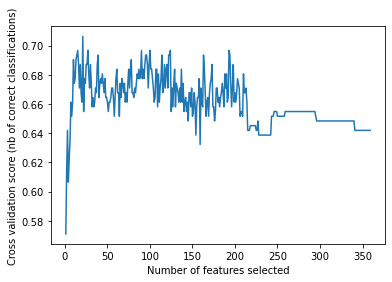

In [62]:
# =======================
# RFECV (SVM)
# Female data
# =======================


svm_clf_6 = SVC(kernel="linear", random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_svm_2 = RFECV(estimator=svm_clf_6, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_svm_2.fit(dataF_train, dataF_train_labels)
rfecv_svm_2_dataF_train = rfecv_svm_2.transform(dataF_train)
rfecv_svm_2_dataF_test = rfecv_svm_2.transform(dataF_test)


print("Optimal number of features : %d" % rfecv_svm_2.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_svm_2.grid_scores_) + min_features_to_select),
         rfecv_svm_2.grid_scores_)
plt.show()

In [63]:
cols = rfecv_svm_2.get_support(indices=True)
x_train_new = dataF_train.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.isthmuscingulate.volume',
 'lh.parahippocampal.volume',
 'lh.rostralanteriorcingulate.volume',
 'lh.transversetemporal.volume',
 'rh.inferiortemporal.volume',
 'lh.caudalmiddlefrontal.area',
 'lh.lateralorbitofrontal.area',
 'lh.paracentral.area',
 'lh.posteriorcingulate.area',
 'rh.inferiortemporal.area',
 'rh.isthmuscingulate.area',
 'rh.lingual.area',
 'rh.insula.area',
 'Left.Hippocampus',
 'Left.Accumbens.area',
 'Left.choroid.plexus',
 'left.CA1',
 'left.fimbria',
 'left.hippocampal.fissure',
 'Right.Hippocampus.HS',
 'right.fimbria']

---
- __Only use the data after RFECV__

In [65]:
# =======================
# Training set (female)
# =======================

start = time.process_time()
svm_clf_7 = SVC(kernel="linear", random_state=42)
svm_clf_7.fit(rfecv_svm_2_dataF_train, dataF_train_labels)

pred = cross_val_predict(svm_clf_7, rfecv_svm_2_dataF_train, dataF_train_labels, cv=10, n_jobs=-1)

print(time.process_time() - start)
print(confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

22.59375
[[148  23   5]
 [ 27  39  15]
 [  8  17  28]]
              precision    recall  f1-score   support

         1.0       0.81      0.84      0.82       176
         2.0       0.49      0.48      0.49        81
         3.0       0.58      0.53      0.55        53

    accuracy                           0.69       310
   macro avg       0.63      0.62      0.62       310
weighted avg       0.69      0.69      0.69       310



In [66]:
# =======================
# Testing set (female)
# =======================

start = time.process_time()

pred = cross_val_predict(svm_clf_7, rfecv_svm_2_dataF_test, dataF_test_labels, cv=10)

print(time.process_time() - start)
print(confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

4.625
[[38  8  0]
 [10  9  1]
 [ 0  3  9]]
              precision    recall  f1-score   support

         1.0       0.79      0.83      0.81        46
         2.0       0.45      0.45      0.45        20
         3.0       0.90      0.75      0.82        12

    accuracy                           0.72        78
   macro avg       0.71      0.68      0.69        78
weighted avg       0.72      0.72      0.72        78



---
- __RFECV (SVM) + Feature scaling + PCA__

In [132]:
# =======================
# Training set (female)
# RFECV (SVM)
# =======================


svm_clf_8 = SVC(kernel="linear", random_state=42)
start = time.process_time()

# Feature scaling
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(rfecv_svm_2_dataF_train)

# Dimension reduction
pca = PCA(n_components=0.95)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)


svm_clf_8.fit(x_train_scaled_reduced, dataF_train_labels)
pred = cross_val_predict(svm_clf_8, x_train_scaled_reduced, dataF_train_labels, cv=10)


print(time.process_time() - start)
print(confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

[0.3177644  0.11270682 0.06263587 0.05810147 0.05034932 0.04902206
 0.04448783 0.03499623 0.03420895 0.03200746 0.03060723 0.02672355
 0.0245476  0.02193538 0.02135522 0.01933691 0.01770575]
[0.18856705 0.06688223 0.03716924 0.03447845 0.02987818 0.02909056
 0.02639987 0.02076739 0.0203002  0.01899379 0.01816287 0.01585823
 0.01456698 0.01301685 0.01267257 0.01147486 0.01050691]
Components: 17
0.1875
[[164   9   3]
 [ 44  28   9]
 [ 10  10  33]]
              precision    recall  f1-score   support

         1.0       0.75      0.93      0.83       176
         2.0       0.60      0.35      0.44        81
         3.0       0.73      0.62      0.67        53

    accuracy                           0.73       310
   macro avg       0.69      0.63      0.65       310
weighted avg       0.71      0.73      0.70       310



Text(0, 0.5, 'cumulative explained variance')

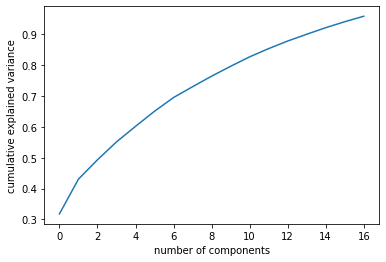

In [133]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [129]:
# =======================
# Testing set (female)
# RFECV (SVM)
# =======================


start = time.process_time()

# Feature scaling
scaler = MinMaxScaler()
x_test_scaled = scaler.fit_transform(rfecv_svm_2_dataF_test)

# Dimension reduction
pca = PCA(n_components=0.95)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)


pred = cross_val_predict(svm_clf_8, x_test_scaled_reduced, dataF_test_labels, cv=10)


print(time.process_time() - start)
print(confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Components: 16
0.015625
[[44  2  0]
 [15  4  1]
 [ 2  1  9]]
              precision    recall  f1-score   support

         1.0       0.72      0.96      0.82        46
         2.0       0.57      0.20      0.30        20
         3.0       0.90      0.75      0.82        12

    accuracy                           0.73        78
   macro avg       0.73      0.64      0.65        78
weighted avg       0.71      0.73      0.69        78



<hr style="border:px solid black"> </hr>

### 5.1.2 Logistic Regression

- __Baseline__

In [134]:
# =======================
# Training set (female)
# =======================


start = time.process_time()
log_reg_5 = LogisticRegression(max_iter=10000000, penalty='l2', random_state=42)
log_reg_5.fit(dataF_train, dataF_train_labels)

pred = cross_val_predict(log_reg_5, dataF_train, dataF_train_labels, cv=10, n_jobs=-1)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Times:  39.515625
Confusion matrix: 
 [[138  30   8]
 [ 31  32  18]
 [  5  21  27]]
              precision    recall  f1-score   support

         1.0       0.79      0.78      0.79       176
         2.0       0.39      0.40      0.39        81
         3.0       0.51      0.51      0.51        53

    accuracy                           0.64       310
   macro avg       0.56      0.56      0.56       310
weighted avg       0.64      0.64      0.64       310



In [135]:
# =======================
# Testing set (female)
# =======================


start = time.process_time()

pred = cross_val_predict(log_reg_5, dataF_test, dataF_test_labels, cv=10, n_jobs=-1)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Times:  0.046875
Confusion matrix: 
 [[35  8  3]
 [12  5  3]
 [ 3  5  4]]
              precision    recall  f1-score   support

         1.0       0.70      0.76      0.73        46
         2.0       0.28      0.25      0.26        20
         3.0       0.40      0.33      0.36        12

    accuracy                           0.56        78
   macro avg       0.46      0.45      0.45        78
weighted avg       0.55      0.56      0.55        78



---
- __RFECV (Logistic Regression)__

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Optimal number of features : 14
Time:  7452.421875


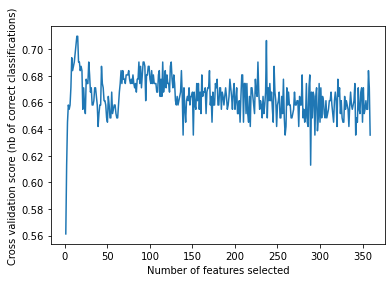

In [69]:
# ============================
# Female data
# Logistic Regression - RFECV
# ============================

log_reg_6 = LogisticRegression(max_iter=100000000, penalty='l2', random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_lr_2 = RFECV(estimator=log_reg_6, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_lr_2.fit(dataF_train, dataF_train_labels)
rfecv_lr_2_dataF_train = rfecv_lr_2.transform(dataF_train)
rfecv_lr_2_dataF_test = rfecv_lr_2.transform(dataF_test)


print("Optimal number of features : %d" % rfecv_lr_2.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_lr_2.grid_scores_) + min_features_to_select),
         rfecv_lr_2.grid_scores_)
plt.show()


In [136]:
cols = rfecv_lr_2.get_support(indices=True)
x_train_new = dataF_train.iloc[:,cols]

x_train_new.columns.values.tolist()      # Optimal feature's name

['lh.pericalcarine.volume',
 'lh.transversetemporal.volume',
 'rh.pericalcarine.volume',
 'lh.lateralorbitofrontal.area',
 'lh.pericalcarine.area',
 'rh.lingual.area',
 'rh.parstriangularis.area',
 'rh.posteriorcingulate.area',
 'Left.Hippocampus',
 'Left.choroid.plexus',
 'left.CA1',
 'left.hippocampal.fissure',
 'Right.Hippocampus.HS',
 'right.hippocampal.fissure']

---
- __Only use the data after RFECV__

In [137]:
# =======================
# rfecv - train set
# =======================

start = time.process_time()
log_reg_7 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
log_reg_7.fit(rfecv_lr_2_dataF_train, dataF_train_labels)

pred = cross_val_predict(log_reg_7, rfecv_lr_2_dataF_train, dataF_train_labels, cv=10, n_jobs=-1)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

Times:  0.078125
Confusion matrix: 
 [[150  23   3]
 [ 27  36  18]
 [  9  15  29]]
              precision    recall  f1-score   support

         1.0       0.81      0.85      0.83       176
         2.0       0.49      0.44      0.46        81
         3.0       0.58      0.55      0.56        53

    accuracy                           0.69       310
   macro avg       0.62      0.61      0.62       310
weighted avg       0.68      0.69      0.69       310



In [138]:
# =======================
# rfecv - test set
# =======================

start = time.process_time()

pred = cross_val_predict(log_reg_7, rfecv_lr_2_dataF_test, dataF_test_labels, cv=10, n_jobs=-1)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Times:  0.015625
Confusion matrix: 
 [[32  8  6]
 [ 9  7  4]
 [ 3  3  6]]
              precision    recall  f1-score   support

         1.0       0.73      0.70      0.71        46
         2.0       0.39      0.35      0.37        20
         3.0       0.38      0.50      0.43        12

    accuracy                           0.58        78
   macro avg       0.50      0.52      0.50        78
weighted avg       0.59      0.58      0.58        78



---
- __RFECV (Logistic Regression) + Feature scaling + PCA__

In [189]:
# =======================
# training set
# =======================


log_reg_8 = LogisticRegression(max_iter=60000, penalty='l2', random_state=42)
start = time.process_time()

# Feature scaling MinMaxScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr_2_dataF_train)

# Dimension reduction
pca = PCA(n_components=3)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)


print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)


log_reg_8.fit(x_train_scaled_reduced, dataF_train_labels)

pred = cross_val_predict(log_reg_8, x_train_scaled_reduced, dataF_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

[0.31180589 0.14495884 0.1035139 ]
[4.37940959 2.03599152 1.45388455]
Components: 3
Times:  0.375
Confusion matrix: 
 [[153  18   5]
 [ 46  21  14]
 [ 14  11  28]]
              precision    recall  f1-score   support

         1.0       0.72      0.87      0.79       176
         2.0       0.42      0.26      0.32        81
         3.0       0.60      0.53      0.56        53

    accuracy                           0.65       310
   macro avg       0.58      0.55      0.56       310
weighted avg       0.62      0.65      0.63       310



Text(0, 0.5, 'cumulative explained variance')

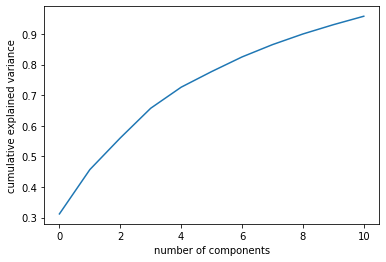

In [141]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [190]:
# =======================
# test set
# =======================

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_lr_2_dataF_test)

# Dimension reduction
pca = PCA(n_components=3)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(log_reg_8, x_train_scaled_reduced, dataF_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Components: 3
Times:  0.0625
Confusion matrix: 
 [[39  5  2]
 [10  7  3]
 [ 3  3  6]]
              precision    recall  f1-score   support

         1.0       0.75      0.85      0.80        46
         2.0       0.47      0.35      0.40        20
         3.0       0.55      0.50      0.52        12

    accuracy                           0.67        78
   macro avg       0.59      0.57      0.57        78
weighted avg       0.65      0.67      0.65        78



<hr style="border:px solid black"> </hr>

## 5.1.3 Decision tree
- __Baseline__

In [191]:
# =============
# train set
# =============

start = time.process_time()
tree_clf_5 = DecisionTreeClassifier(random_state=42)
tree_clf_5.fit(dataF_train, dataF_train_labels)

pred = cross_val_predict(tree_clf_5, dataF_train, dataF_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

Times:  0.515625
Confusion matrix: 
 [[127  34  15]
 [ 34  32  15]
 [ 14  12  27]]
              precision    recall  f1-score   support

         1.0       0.73      0.72      0.72       176
         2.0       0.41      0.40      0.40        81
         3.0       0.47      0.51      0.49        53

    accuracy                           0.60       310
   macro avg       0.54      0.54      0.54       310
weighted avg       0.60      0.60      0.60       310



In [192]:
# =============
# test set
# =============

start = time.process_time()

pred = cross_val_predict(tree_clf_5, dataF_test, dataF_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Times:  0.109375
Confusion matrix: 
 [[32 10  4]
 [15  3  2]
 [ 5  1  6]]
              precision    recall  f1-score   support

         1.0       0.62      0.70      0.65        46
         2.0       0.21      0.15      0.18        20
         3.0       0.50      0.50      0.50        12

    accuracy                           0.53        78
   macro avg       0.44      0.45      0.44        78
weighted avg       0.49      0.53      0.51        78



---
- __RFECV (Decision Tree Classifier)__

Optimal number of features : 4
Time:  9.40625


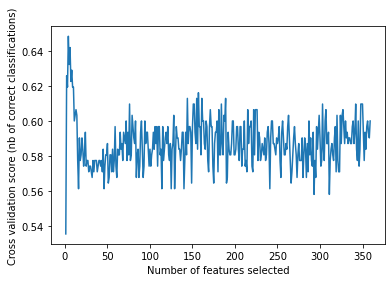

In [32]:
# ========================
# Female data
# Decision Tree - RFECV
# ========================

tree_clf_6 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_tree_2 = RFECV(estimator=tree_clf_6, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_tree_2.fit(dataF_train, dataF_train_labels)
rfecv_tree_2_dataF_train = rfecv_tree_2.transform(dataF_train)
rfecv_tree_2_dataF_test = rfecv_tree_2.transform(dataF_test)


print("Optimal number of features : %d" % rfecv_tree_2.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_tree_2.grid_scores_) + min_features_to_select),
         rfecv_tree_2.grid_scores_)
plt.show()


In [203]:
cols = rfecv_tree_2.get_support(indices=True)
dataF_train_new_3 = dataF_train.iloc[:,cols]

dataF_train_new_3.columns.values.tolist()      # Optimal feature's name

['rh.entorhinal.thickness',
 'rh.inferiorparietal.thicknessstd',
 'Left.Cerebellum.Cortex',
 'Left.Hippocampus']

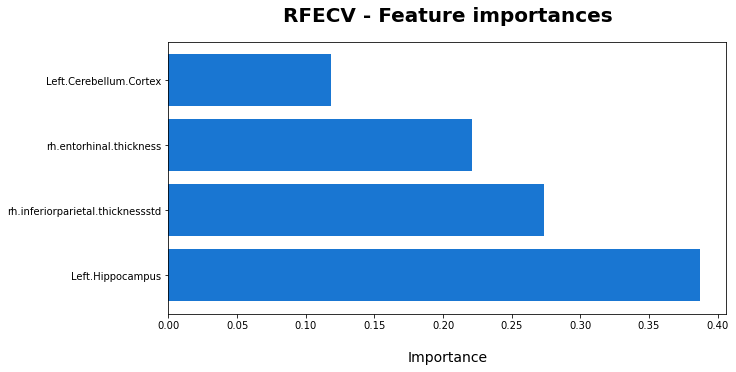

In [206]:
dset = pd.DataFrame()
dset['attr'] = dataF_train_new_3.columns.values
dset['importance'] = rfecv_tree_2.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [160]:
# ========================
# rfecv - train set
# ========================

start = time.process_time()
tree_clf_7 = DecisionTreeClassifier(random_state=42)
tree_clf_7.fit(rfecv_tree_2_dataF_train, dataF_train_labels)

pred = cross_val_predict(tree_clf_7, rfecv_tree_2_dataF_train, dataF_train_labels, cv=10)


print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

Times:  0.03125
Confusion matrix: 
 [[131  28  17]
 [ 28  37  16]
 [ 10  16  27]]
              precision    recall  f1-score   support

         1.0       0.78      0.74      0.76       176
         2.0       0.46      0.46      0.46        81
         3.0       0.45      0.51      0.48        53

    accuracy                           0.63       310
   macro avg       0.56      0.57      0.56       310
weighted avg       0.64      0.63      0.63       310



In [161]:
# ========================
# rfecv - test set
# ========================

start = time.process_time()

pred = cross_val_predict(tree_clf_7, rfecv_tree_2_dataF_test, dataF_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Times:  0.015625
Confusion matrix: 
 [[27 18  1]
 [10  6  4]
 [ 4  1  7]]
              precision    recall  f1-score   support

         1.0       0.66      0.59      0.62        46
         2.0       0.24      0.30      0.27        20
         3.0       0.58      0.58      0.58        12

    accuracy                           0.51        78
   macro avg       0.49      0.49      0.49        78
weighted avg       0.54      0.51      0.52        78



---
- __RFECV (DT) + Feature scaling + PCA__

In [173]:
# =======================
# training set
# =======================

tree_clf_8 = DecisionTreeClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_tree_2_dataF_train)

# Dimension reduction
pca = PCA(n_components=0.95)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)


print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)


tree_clf_8.fit(x_train_scaled_reduced, dataF_train_labels)

pred = cross_val_predict(tree_clf_8, x_train_scaled_reduced, dataF_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

[0.46203913 0.25724259 0.18293891 0.09777938]
[1.8541376  1.03230035 0.73412376 0.39238327]
Components: 4
Times:  0.1875
Confusion matrix: 
 [[127  37  12]
 [ 33  32  16]
 [ 13  16  24]]
              precision    recall  f1-score   support

         1.0       0.73      0.72      0.73       176
         2.0       0.38      0.40      0.39        81
         3.0       0.46      0.45      0.46        53

    accuracy                           0.59       310
   macro avg       0.52      0.52      0.52       310
weighted avg       0.59      0.59      0.59       310



In [172]:
# test set

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_tree_2_dataF_test)

# Dimension reduction
pca = PCA(n_components=0.95)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(tree_clf_8, x_test_scaled_reduced, dataF_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Components: 4
Times:  0.1875
Confusion matrix: 
 [[32 10  4]
 [13  4  3]
 [ 3  5  4]]
              precision    recall  f1-score   support

         1.0       0.67      0.70      0.68        46
         2.0       0.21      0.20      0.21        20
         3.0       0.36      0.33      0.35        12

    accuracy                           0.51        78
   macro avg       0.41      0.41      0.41        78
weighted avg       0.50      0.51      0.51        78



<hr style="border:px solid black"> </hr>

## 5.1.4 Random Forest
- __Baseline__

In [244]:
# ===========
# train set
# ===========

start = time.process_time()
forest_clf_5 = RandomForestClassifier(random_state=42)
forest_clf_5.fit(dataF_train, dataF_train_labels)

pred = cross_val_predict(forest_clf_5, dataF_train, dataF_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

Times:  2.890625
Confusion matrix: 
 [[155  18   3]
 [ 45  28   8]
 [  7  12  34]]
              precision    recall  f1-score   support

         1.0       0.75      0.88      0.81       176
         2.0       0.48      0.35      0.40        81
         3.0       0.76      0.64      0.69        53

    accuracy                           0.70       310
   macro avg       0.66      0.62      0.64       310
weighted avg       0.68      0.70      0.68       310



In [245]:
# ===========
# test set
# ===========

start = time.process_time()

pred = cross_val_predict(forest_clf_5, dataF_test, dataF_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Times:  1.25
Confusion matrix: 
 [[41  5  0]
 [13  6  1]
 [ 3  1  8]]
              precision    recall  f1-score   support

         1.0       0.72      0.89      0.80        46
         2.0       0.50      0.30      0.37        20
         3.0       0.89      0.67      0.76        12

    accuracy                           0.71        78
   macro avg       0.70      0.62      0.64        78
weighted avg       0.69      0.71      0.68        78



---
- __RFECV (Random Forest Classifier)__

Optimal number of features : 267
Time:  23.265625


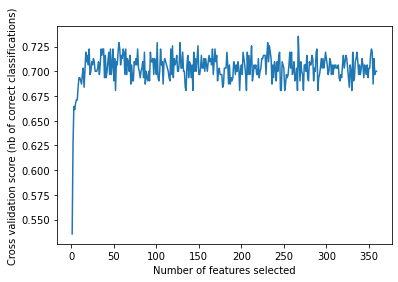

In [112]:
# =======================
# Female data
# Random Forest - RFECV
# =======================

forest_clf_6 = RandomForestClassifier(random_state=42)
start = time.process_time()

min_features_to_select = 1  # Mini mum number of features to consider
rfecv_forest_2 = RFECV(estimator=forest_clf_6, step=1, cv=StratifiedKFold(10), scoring='accuracy', 
                min_features_to_select=min_features_to_select, n_jobs=-1)

rfecv_forest_2.fit(dataF_train, dataF_train_labels)
rfecv_forest_2_dataF_train = rfecv_forest_2.transform(dataF_train)
rfecv_forest_2_dataF_test = rfecv_forest_2.transform(dataF_test)


print("Optimal number of features : %d" % rfecv_forest_2.n_features_)
print("Time: ", time.process_time() - start)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv_forest_2.grid_scores_) + min_features_to_select),
         rfecv_forest_2.grid_scores_)
plt.show()


In [249]:
cols = rfecv_forest_2.get_support(indices=True)
dataF_train_new_4 = dataF_train.iloc[:,cols]

dataF_train_new_4.columns.values.tolist()      # Optimal feature's name

['lh.caudalanteriorcingulate.thickness',
 'lh.caudalmiddlefrontal.thickness',
 'lh.entorhinal.thickness',
 'lh.fusiform.thickness',
 'lh.inferiorparietal.thickness',
 'lh.inferiortemporal.thickness',
 'lh.isthmuscingulate.thickness',
 'lh.lateraloccipital.thickness',
 'lh.lateralorbitofrontal.thickness',
 'lh.lingual.thickness',
 'lh.medialorbitofrontal.thickness',
 'lh.middletemporal.thickness',
 'lh.parahippocampal.thickness',
 'lh.paracentral.thickness',
 'lh.parsopercularis.thickness',
 'lh.pericalcarine.thickness',
 'lh.postcentral.thickness',
 'lh.posteriorcingulate.thickness',
 'lh.precentral.thickness',
 'lh.precuneus.thickness',
 'lh.rostralanteriorcingulate.thickness',
 'lh.rostralmiddlefrontal.thickness',
 'lh.superiorfrontal.thickness',
 'lh.superiorparietal.thickness',
 'lh.superiortemporal.thickness',
 'lh.supramarginal.thickness',
 'lh.frontalpole.thickness',
 'lh.temporalpole.thickness',
 'lh.insula.thickness',
 'lh.MeanThickness.thickness',
 'rh.bankssts.thickness',
 '

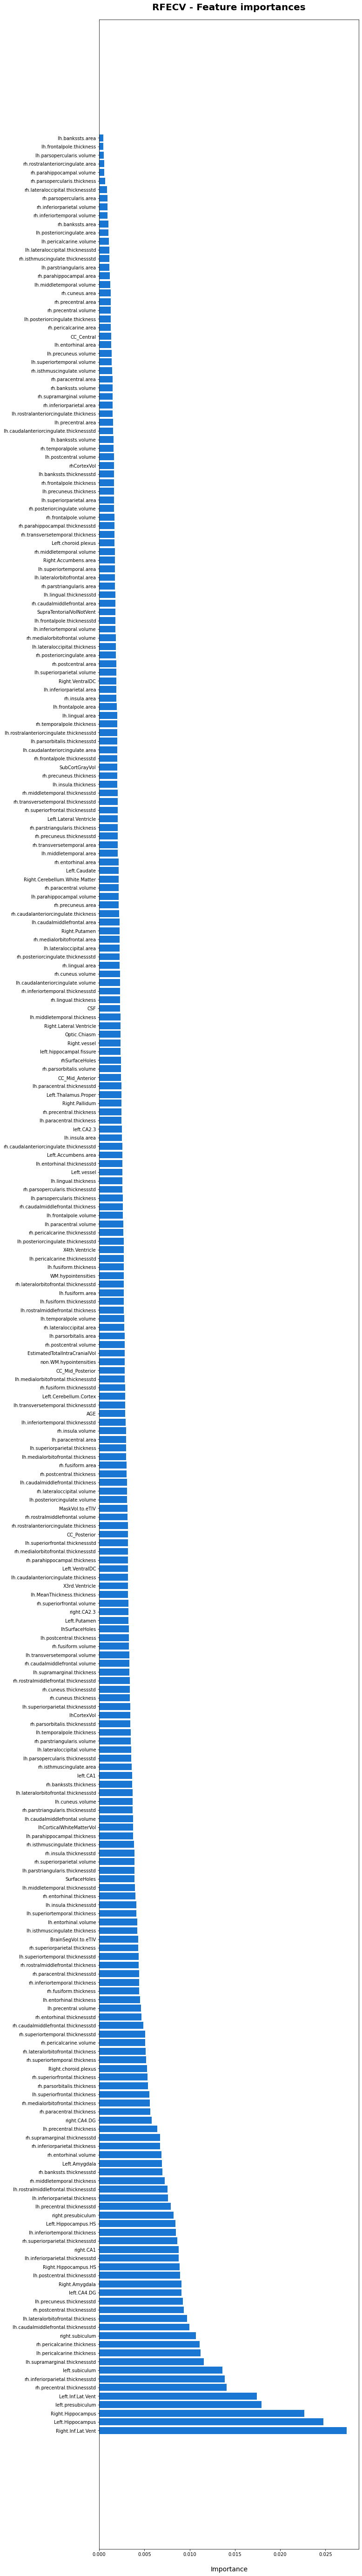

In [198]:
dset = pd.DataFrame()
dset['attr'] = dataF_train_new_4.columns.values
dset['importance'] = rfecv_forest_2.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 100))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

---
- __Only use the data after RFECV__

In [247]:
# =======================
# rfecv - training set
# =======================

start = time.process_time()
forest_clf_7 = RandomForestClassifier(random_state=42)
forest_clf_7.fit(rfecv_forest_2_dataF_train, dataF_train_labels)

pred = cross_val_predict(forest_clf_7, rfecv_forest_2_dataF_train, dataF_train_labels, cv=10)


print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

Times:  2.46875
Confusion matrix: 
 [[153  19   4]
 [ 38  35   8]
 [  9  14  30]]
              precision    recall  f1-score   support

         1.0       0.77      0.87      0.81       176
         2.0       0.51      0.43      0.47        81
         3.0       0.71      0.57      0.63        53

    accuracy                           0.70       310
   macro avg       0.66      0.62      0.64       310
weighted avg       0.69      0.70      0.69       310



In [248]:
# =======================
# rfecv - testing set
# =======================

start = time.process_time()

pred = cross_val_predict(forest_clf_7, rfecv_forest_2_dataF_test, dataF_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Times:  1.21875
Confusion matrix: 
 [[43  3  0]
 [13  6  1]
 [ 1  3  8]]
              precision    recall  f1-score   support

         1.0       0.75      0.93      0.83        46
         2.0       0.50      0.30      0.37        20
         3.0       0.89      0.67      0.76        12

    accuracy                           0.73        78
   macro avg       0.71      0.63      0.66        78
weighted avg       0.71      0.73      0.71        78



---
- __RFECV (RF) + Feature scaling + PCA__

In [127]:
# =======================
# training set
# =======================

forest_clf_8 = RandomForestClassifier(random_state=42)
start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(rfecv_forest_2_dataF_train)

# Dimension reduction
pca = PCA(n_components=5)
x_train_scaled_reduced = pca.fit_transform(x_train_scaled)


print (pca.explained_variance_ratio_)
print (pca.explained_variance_)
print ("Components:",pca.n_components_)


forest_clf_8.fit(x_train_scaled_reduced, dataF_train_labels)

pred = cross_val_predict(forest_clf_8, x_train_scaled_reduced, dataF_train_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_train_labels, pred))
print(classification_report(dataF_train_labels, pred))

[0.20092302 0.11441133 0.07805671 0.05847832 0.02555442]
[53.82005825 30.64668525 20.90858758 15.66424157  6.84511084]
Components: 5
Times:  2.59375
Confusion matrix: 
 [[143  29   4]
 [ 30  39  12]
 [ 11  11  31]]
              precision    recall  f1-score   support

         1.0       0.78      0.81      0.79       176
         2.0       0.49      0.48      0.49        81
         3.0       0.66      0.58      0.62        53

    accuracy                           0.69       310
   macro avg       0.64      0.63      0.63       310
weighted avg       0.68      0.69      0.68       310



In [126]:
# test set

start = time.process_time()

# Feature scaling
scaler = StandardScaler()
x_test_scaled = scaler.fit_transform(rfecv_forest_2_dataF_test)

# Dimension reduction
pca = PCA(n_components=5)
x_test_scaled_reduced = pca.fit_transform(x_test_scaled)

print ("Components:",pca.n_components_)

pred = cross_val_predict(tree_clf_8, x_test_scaled_reduced, dataF_test_labels, cv=10)

print("Times: ", time.process_time() - start)
print("Confusion matrix: \n", confusion_matrix(dataF_test_labels, pred))
print(classification_report(dataF_test_labels, pred))

Components: 5
Times:  0.1875
Confusion matrix: 
 [[39  5  2]
 [ 4 15  1]
 [ 2  2  8]]
              precision    recall  f1-score   support

         1.0       0.87      0.85      0.86        46
         2.0       0.68      0.75      0.71        20
         3.0       0.73      0.67      0.70        12

    accuracy                           0.79        78
   macro avg       0.76      0.75      0.76        78
weighted avg       0.80      0.79      0.80        78

